# Step1: Building the Test and Development Environment 

In [1]:
%time

Wall time: 0 ns


In [2]:
conda install Jinja2

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Varun\anaconda3

  added / updated specs:
    - jinja2


The following packages will be UPDATED:

  conda              conda-forge::conda-22.11.1-py39hcbf53~ --> pkgs/main::conda-22.11.1-py39haa95532_4 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda update -n base -c conda-forge conda

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Varun\anaconda3

  added / updated specs:
    - conda


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-22.11.1-py39haa95532~ --> conda-forge::conda-22.11.1-py39hcbf5309_1 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [4]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install -c conda-forge prettytable

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
!pip install yfinance

import yfinance as yf

C:\Users\Varun\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Step2: Getting the Dataset 

In [8]:
#Figure out the time taken to read the datasets with the majix 
%time
data=pd.read_csv('TSLA.csv')
ticker = 'TSLA'

Wall time: 0 ns


## Data description:
We have downloaded the daily stock prices data using the Yahoo finance API functionality. It’s a 10-year data capturing Open, High, Low, Close, and Volume

- Open: The price of the stock when the market opens in the morning
- Close: The price of the stock when the market closed in the evening
- High: Highest price the stock reached during that day
- Low: Lowest price the stock is traded on that day
- Adj Close: Amends a stock's closing price to reflect that stock's value after accounting for any corporate actions.
- Volume: The total amount of stocks traded on that day

In [9]:
%time
data

Wall time: 0 ns


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [10]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [11]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [13]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [14]:
print('length of the data is' , len(data))

length of the data is 2416


In [15]:
data.shape

(2416, 7)

In [16]:
np.sum(data.isnull().any (axis=1))

0

# Step3:  Data Exploration

In [17]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [18]:
print('Count of Columns in the data is:  ', len(data.columns))

Count of Columns in the data is:   7


In [19]:
print('Count of rows in the data is:', len(data))

Count of rows in the data is: 2416


In [20]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


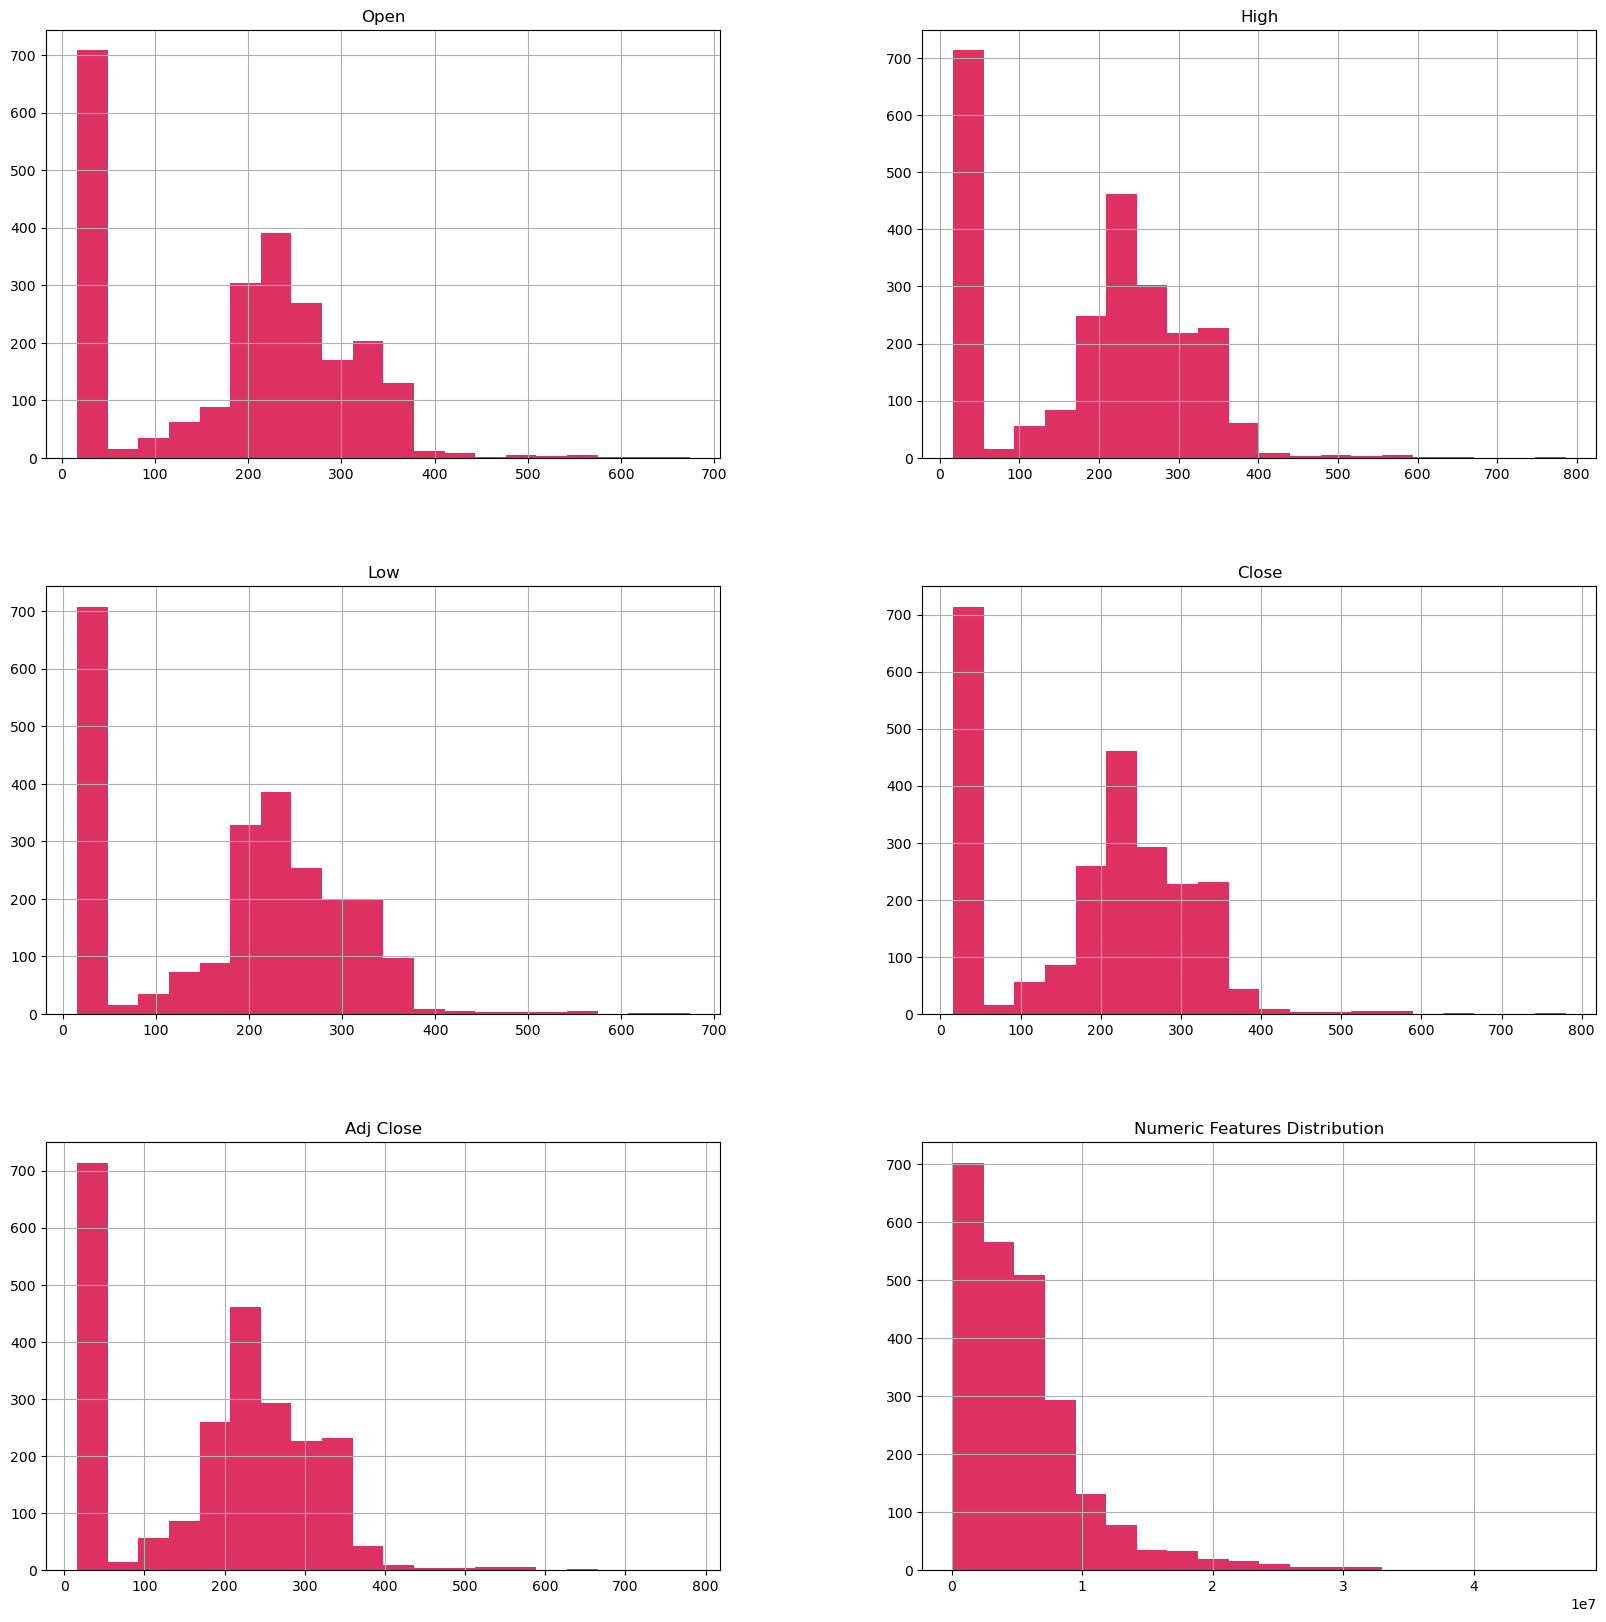

In [21]:
data.hist(figsize=(20,20),bins = 20, color="#DE3163")
plt.title("Numeric Features Distribution")
plt.show()

### Open
The term "open" appears in several usages in the financial markets. However, there are two that hold particular significance, depending on the context in which they are used.

- The open is the starting period of trading on a securities exchange or organized over-the-counter market.
- An order to buy or sell securities is considered to be open, or in effect, until it is either canceled by the customer, until it is executed, or until it expires.

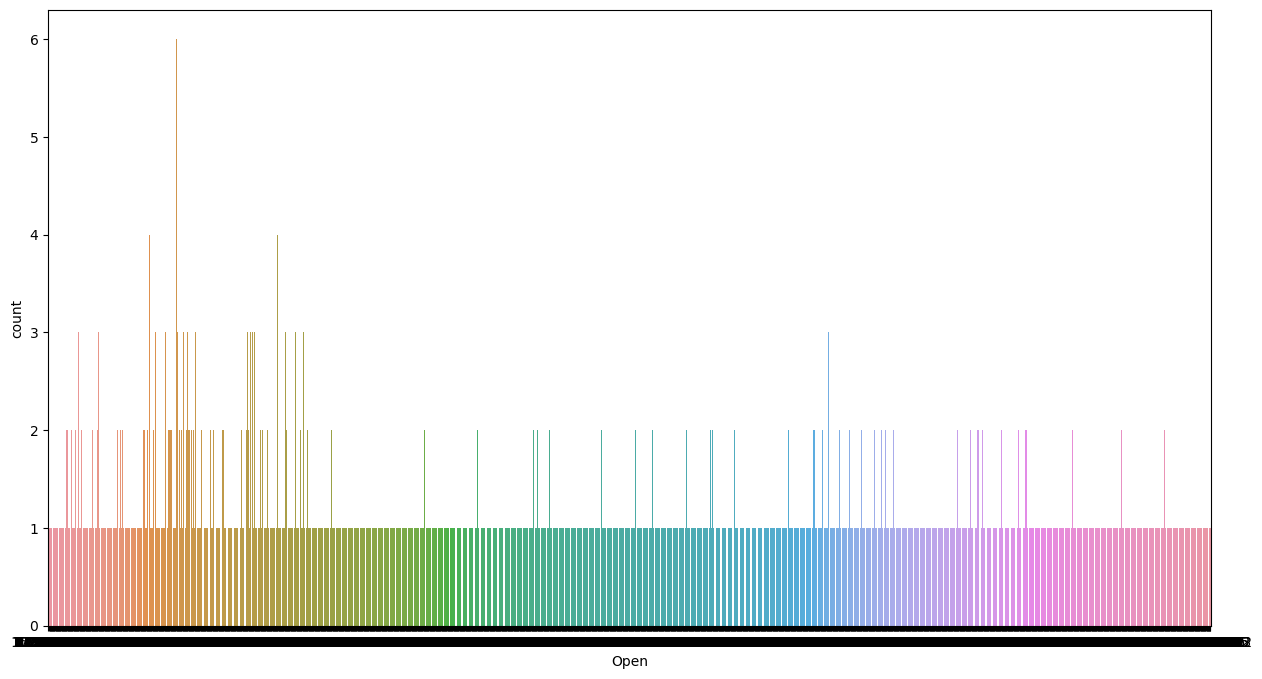

In [22]:
sns.countplot(data= data,  x = "Open")
plt.gcf().set_size_inches(15, 8)
plt.show()

### Adjusted Close Price
- The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. It is often used when examining historical returns or doing a detailed analysis of past performance.

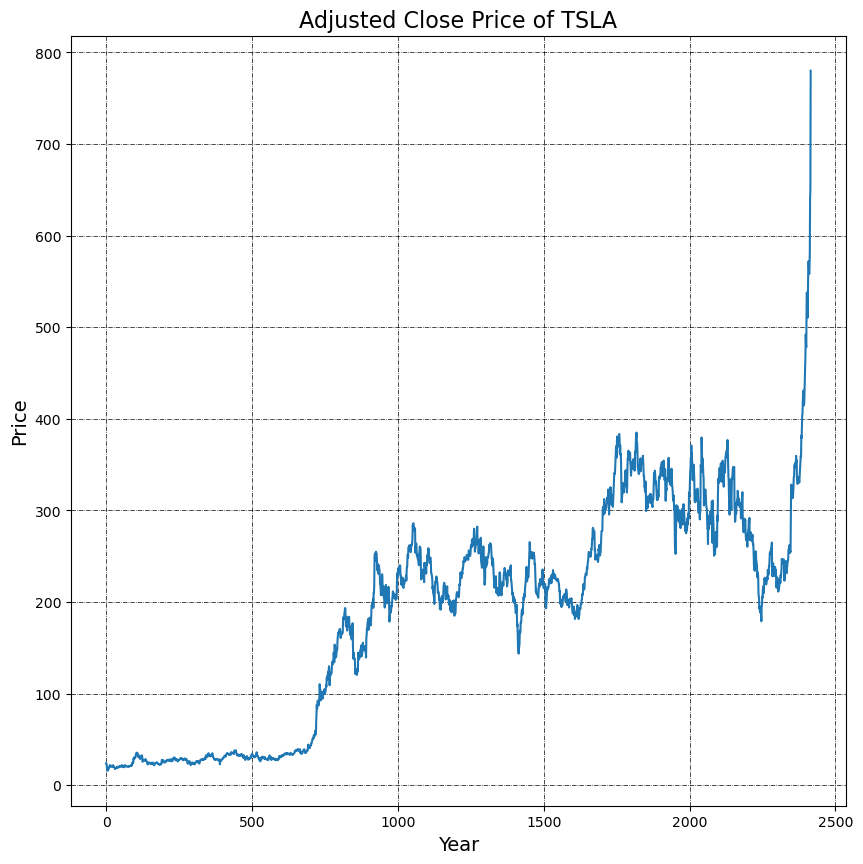

In [23]:
# Plot the adjusted close price
data['Adj Close'].plot(figsize=(10, 10))

plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

### Volume
- Volume is simply the number of shares traded in a particular stock, index, or other investment over a specific period of time.

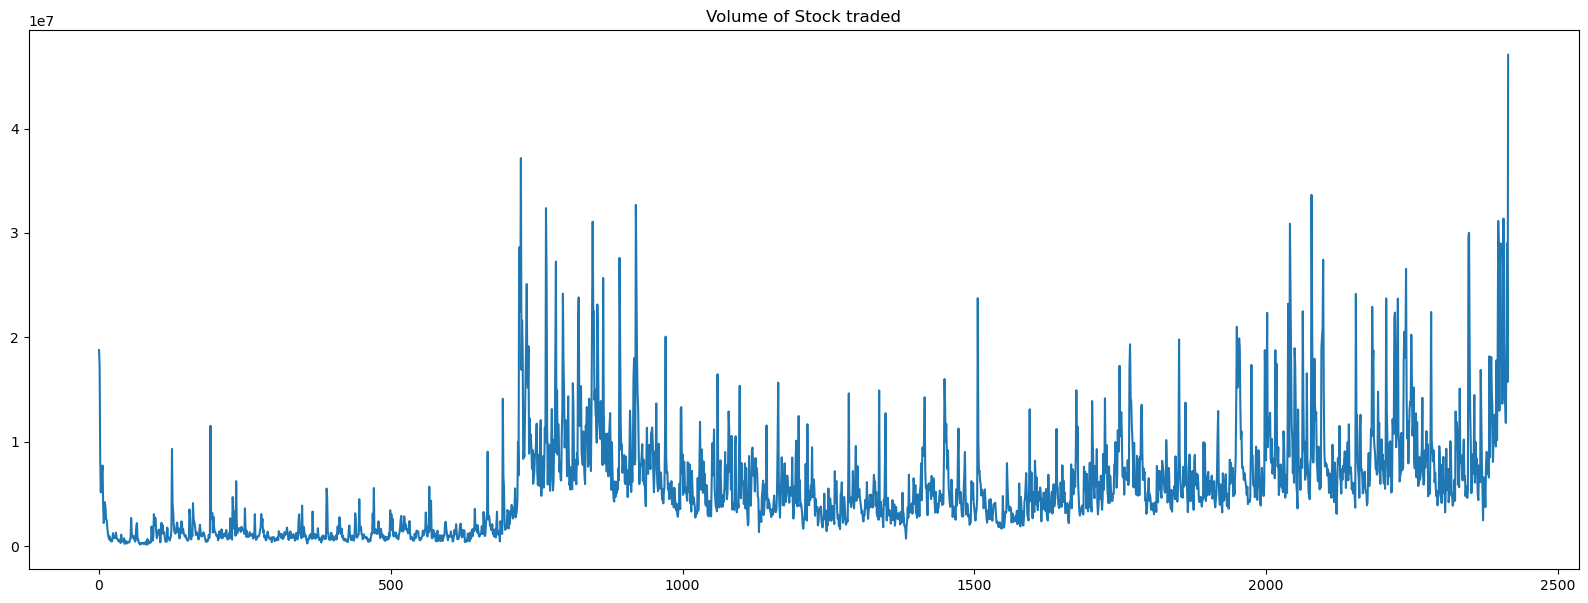

In [24]:
#Volume of Stock Traded
data['Volume'].plot(label = 'TSLA', figsize = (20,7))
plt.title('Volume of Stock traded')
plt.show()

### Market Capitalisation
- Market capitalization refers to the total dollar market value of a company's outstanding shares of stock. The investment community uses this figure to determine a company's size instead of sales or total asset figures. In an acquisition, the market cap is used to determine whether a takeover candidate represents a good value or not to the acquirer.

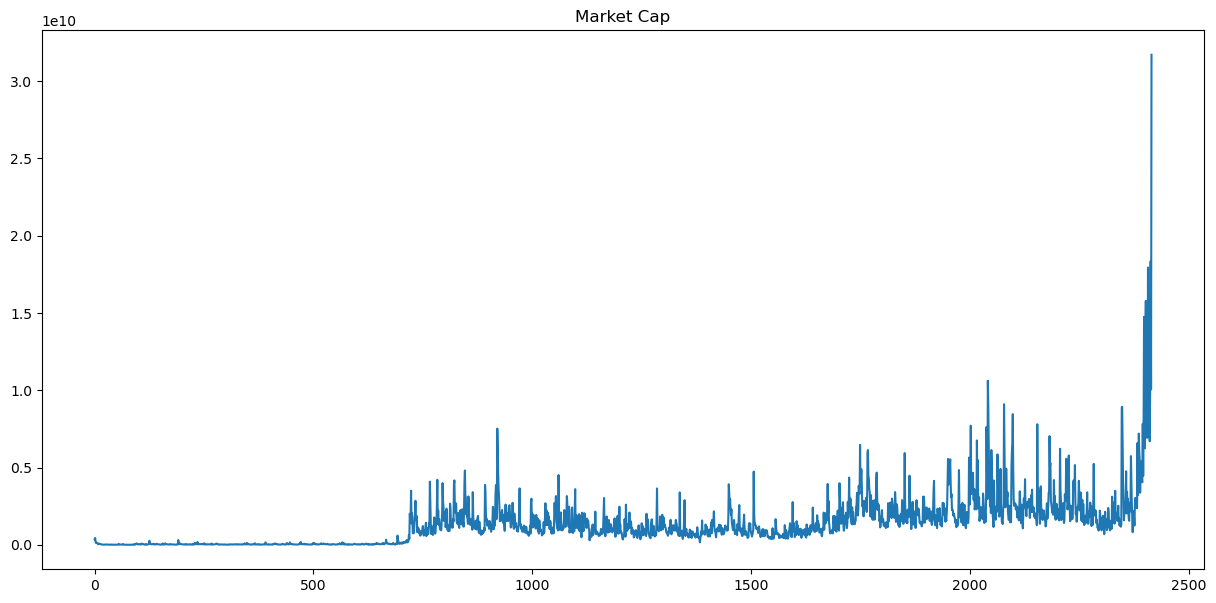

In [25]:
#Market Capitalisation
data['MarktCap'] = data['Open'] * data['Volume']
data['MarktCap'].plot(label = 'TSLA', figsize = (15,7))
plt.title('Market Cap')
plt.show()

### Volatility
- Volitility can be defined in terms of a percentage increase in stock value is the change in stock comparing that to the previous day. The bigger the value either positive or negative the volatile the stock is.

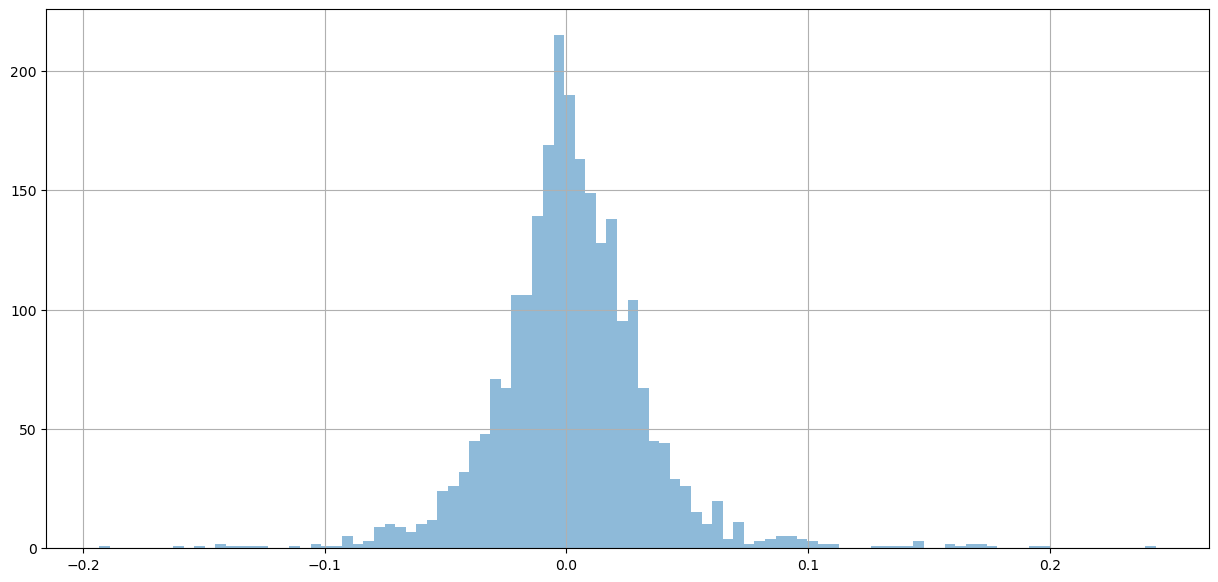

In [26]:
#Volatility
data['returns'] = (data['Close']/data['Close'].shift(1)) -1
data['returns'].hist(bins = 100, label = 'TSLA', alpha = 0.5, figsize = (15,7))
plt.show()

### Moving average
- A moving average is a statistic that captures the average change in a data series over time. In finance, moving averages are often used by technical analysts to keep track of price trends for specific securities.

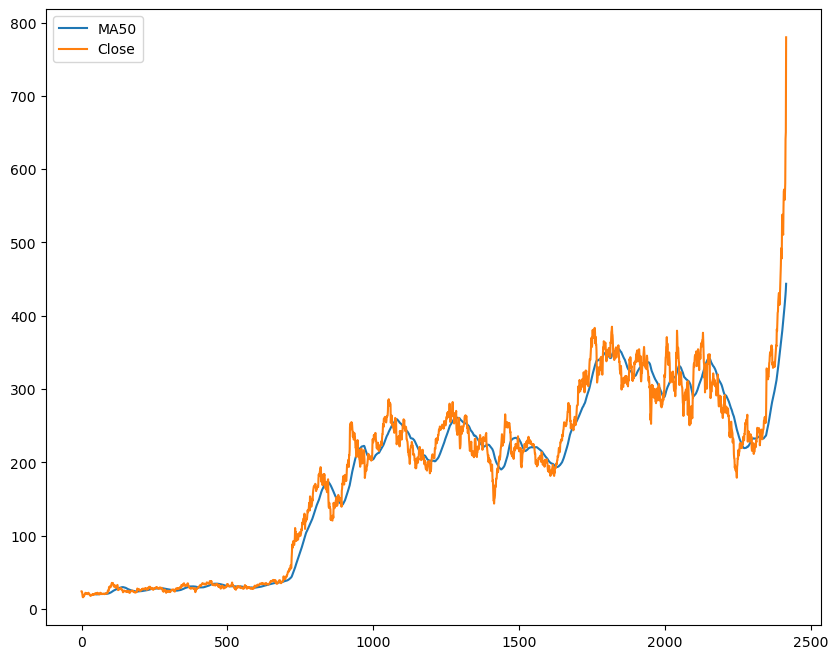

In [27]:
data['ma50'] = data['Close'].rolling(50).mean()
#plot the moving average
plt.figure(figsize=(10, 8))
data['ma50'].plot(label='MA50')
data['Close'].plot(label='Close')
plt.legend()
plt.show()

In [28]:
data['MA10'] = data['Close'].rolling(10).mean()
data['MA50'] = data['Close'].rolling(50).mean()
data = data.dropna()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MarktCap,returns,ma50,MA10,MA50
49,2010-09-08,20.660000,20.950001,20.600000,20.900000,20.900000,288400,5.958344e+06,0.017527,19.8336,20.270,19.8336
50,2010-09-09,21.000000,21.049999,20.690001,20.709999,20.709999,376200,7.900200e+06,-0.009091,19.7700,20.351,19.7700
51,2010-09-10,20.750000,20.930000,19.760000,20.170000,20.170000,386600,8.021950e+06,-0.026074,19.6968,20.393,19.6968
52,2010-09-13,20.889999,20.900000,20.500000,20.719999,20.719999,360800,7.537112e+06,0.027268,19.6720,20.495,19.6720
53,2010-09-14,20.540001,21.600000,20.530001,21.120001,21.120001,654700,1.344754e+07,0.019305,19.7104,20.620,19.7104


### Share
- A share is the single smallest denomination of a company's stock. So if you're divvying up stock and referring to specific characteristics, the proper word to use is shares.

In [29]:
data['Shares'] = [1 if data.loc[ei, 'MA10']>data.loc[ei, 'MA50'] else 0 for ei in data.index]

### Calculating Profit
- To calculate your profit or loss, subtract the current price from the original price.
- The percentage change takes the result from above, divides it by the original purchase price, and multiplies that by 100.

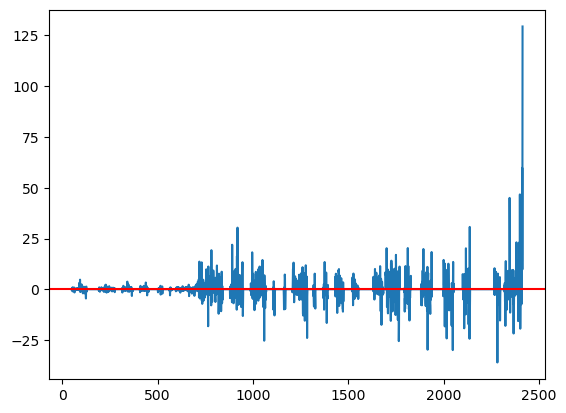

In [30]:
data['Close1'] = data['Close'].shift(-1)
data['Profit'] = [data.loc[ei, 'Close1'] - data.loc[ei, 'Close'] if data.loc[ei, 'Shares']==1 else 0 for ei in data.index]
data['Profit'].plot()
plt.axhline(y=0, color='red')

### Log Return
- Log Return is one of three methods for calculating return and it assumes returns are compounded continuously rather than across sub-periods. It is calculated by taking the natural log of the ending value divided by the beginning value.

In [31]:
data['LogReturn'] = np.log(data['Close']).shift(-1) - np.log(data['Close'])
print(data['LogReturn'])

49     -0.009133
50     -0.026420
51      0.026903
52      0.019121
53      0.039912
          ...   
2411    0.024551
2412    0.097999
2413    0.015116
2414    0.181445
2415         NaN
Name: LogReturn, Length: 2367, dtype: float64


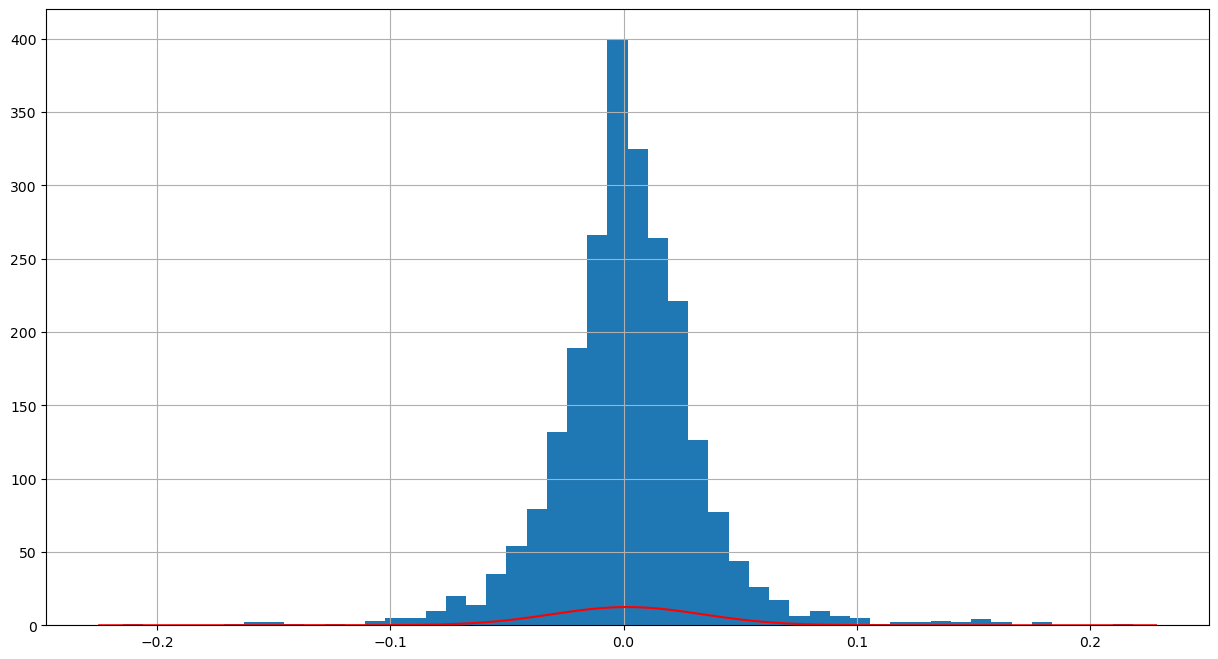

In [32]:
from scipy.stats import norm
mu = data['LogReturn'].mean()
sigma = data['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(data['LogReturn'].min()-0.01, data['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

data['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [33]:
data.isnull().sum().sum()/len(data)

0.0012674271229404308

In [35]:
#lets calculate the total missing values in the each column
data_total = data.isnull().sum()
data_percent = ((data.isnull().sum()/data.shape[0])*100).round(2)
missing_data = pd.concat([data_total, data_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)
missing_data

,Train_Total,Train_Percent %
Adj Close,0,0.00
Close,0,0.00
Close1,1,0.04
Date,0,0.00
High,0,0.00
LogReturn,1,0.04
Low,0,0.00
MA10,0,0.00
MA50,0,0.00
MarktCap,0,0.00


In [36]:
py=data[data['Profit'].isnull()]
py.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MarktCap,returns,ma50,MA10,MA50,Shares,Close1,Profit,LogReturn
2415,2020-02-03,673.690002,786.140015,673.52002,780.0,780.0,47065000,3.170722e+10,0.198949,443.600202,603.107007,443.600202,1,NaN,NaN,NaN


In [37]:
py['Open'].value_counts()

673.690002    1
Name: Open, dtype: int64

In [38]:
data['Profit'].fillna(value=0,inplace=True)
data['Close1'].fillna(value=0,inplace=True)
data['LogReturn'].fillna(value=0,inplace=True)

In [39]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MarktCap     0
returns      0
ma50         0
MA10         0
MA50         0
Shares       0
Close1       0
Profit       0
LogReturn    0
dtype: int64

In [40]:
cdf = data[['High', 'Low', 'Open', 'Volume','Close']]
cdf.head(9)

,High,Low,Open,Volume,Close
49,20.950001,20.600000,20.660000,288400,20.900000
50,21.049999,20.690001,21.000000,376200,20.709999
51,20.930000,19.760000,20.750000,386600,20.170000
52,20.900000,20.500000,20.889999,360800,20.719999
53,21.600000,20.530001,20.540001,654700,21.120001
54,22.000000,20.790001,20.980000,684600,21.980000
55,23.160000,20.840000,22.150000,2684500,20.940001
56,21.320000,19.799999,21.020000,1198500,20.230000
57,21.350000,20.160000,20.670000,947500,21.059999


### corr()
The statistics.correlation() method in Python is used to return Pearson’s correlation coefficient between two inputs.

In [41]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume,MarktCap,returns,ma50,MA10,MA50,Shares,Close1,Profit,LogReturn
Open,1.000000,0.999402,0.999558,0.998840,0.998840,0.498414,0.666689,-0.000865,0.974756,0.996194,0.974756,-0.003132,0.990110,0.071221,-0.016685
High,0.999402,1.000000,0.999365,0.999626,0.999626,0.509826,0.679290,0.016069,0.973688,0.995505,0.973688,-0.003575,0.988581,0.071729,-0.016476
Low,0.999558,0.999365,1.000000,0.999424,0.999424,0.489966,0.661133,0.013330,0.973952,0.995643,0.973952,-0.001976,0.990472,0.072563,-0.016694
Close,0.998840,0.999626,0.999424,1.000000,1.000000,0.501914,0.673867,0.029953,0.973085,0.995043,0.973085,-0.002697,0.988917,0.073819,-0.015881
Adj Close,0.998840,0.999626,0.999424,1.000000,1.000000,0.501914,0.673867,0.029953,0.973085,0.995043,0.973085,-0.002697,0.988917,0.073819,-0.015881
Volume,0.498414,0.509826,0.489966,0.501914,0.501914,1.000000,0.847291,0.077834,0.470547,0.490176,0.470547,-0.013983,0.482975,0.075379,0.037649
MarktCap,0.666689,0.679290,0.661133,0.673867,0.673867,0.847291,1.000000,0.086316,0.601992,0.648158,0.601992,0.016307,0.629618,0.113569,0.025979
returns,-0.000865,0.016069,0.013330,0.029953,0.029953,0.077834,0.086316,1.000000,-0.024608,-0.014577,-0.024608,0.033258,0.013614,0.032898,-0.003790
ma50,0.974756,0.973688,0.973952,0.973085,0.973085,0.470547,0.601992,-0.024608,1.000000,0.983901,1.000000,-0.140951,0.968259,0.037462,-0.023459
MA10,0.996194,0.995505,0.995643,0.995043,0.995043,0.490176,0.648158,-0.014577,0.983901,1.000000,0.983901,-0.019263,0.987627,0.063909,-0.017594


### Linear Regression

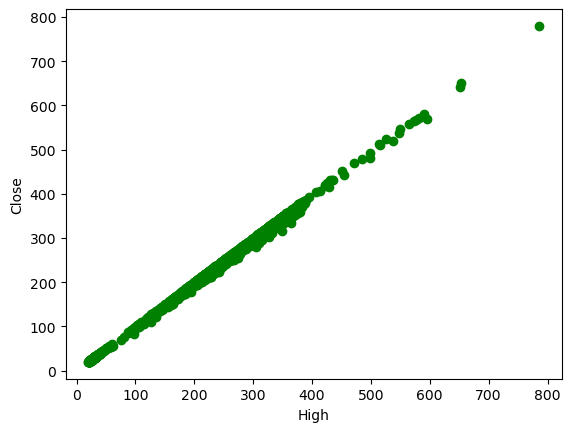

In [42]:
plt.scatter(data.High, data.Close,  color='green')
plt.xlabel("High")
plt.ylabel("Close")
plt.figsize=(15, 8)
plt.show()

In [43]:
msk = np.random.rand(len(data)) < 0.8
train = cdf[msk]
test = cdf[~msk]

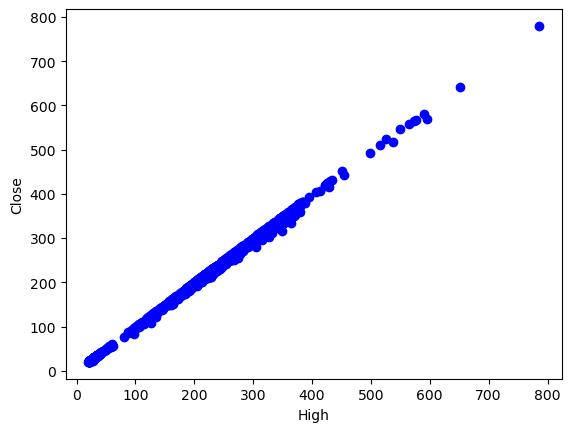

In [44]:
plt.scatter(train.High, train.Close,  color='blue')
plt.xlabel("High")
plt.ylabel("Close")
plt.show()

In [45]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['High', 'Low', 'Open', 'Volume']])
y = np.asanyarray(train[['Close']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 9.11534674e-01  7.41683507e-01 -6.54595947e-01 -1.94005523e-08]]


In [46]:
y_hat= regr.predict(test[['High', 'Low', 'Open', 'Volume']])
x = np.asanyarray(test[['High', 'Low', 'Open', 'Volume']])
y = np.asanyarray(test[['Close']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 4.50
Variance score: 1.00


In [47]:
# Predicted values
print(y_hat)

[[ 20.77095923]
 [ 20.1352568 ]
 [ 20.85626067]
 [ 19.7797977 ]
 [ 21.18150453]
 [ 21.12062012]
 [ 20.68667821]
 [ 20.1058091 ]
 [ 20.58067808]
 [ 20.38166982]
 [ 20.36698342]
 [ 20.20203316]
 [ 29.06383282]
 [ 29.45744456]
 [ 29.36659247]
 [ 30.84944657]
 [ 34.56777473]
 [ 35.12619071]
 [ 30.77879424]
 [ 28.42024067]
 [ 30.98763079]
 [ 32.47714871]
 [ 32.32904857]
 [ 26.81705685]
 [ 23.18040137]
 [ 24.83424212]
 [ 23.76200646]
 [ 24.51970489]
 [ 23.60298576]
 [ 24.39645703]
 [ 23.81610167]
 [ 26.05498307]
 [ 26.60915367]
 [ 25.33653062]
 [ 24.68499485]
 [ 26.12512756]
 [ 27.03454751]
 [ 27.3200843 ]
 [ 26.67251634]
 [ 26.15097864]
 [ 27.59413852]
 [ 25.94851422]
 [ 30.85893064]
 [ 28.77379842]
 [ 28.5870429 ]
 [ 27.89709453]
 [ 28.05630032]
 [ 27.96707813]
 [ 28.05925504]
 [ 28.54083647]
 [ 26.85928685]
 [ 23.66245655]
 [ 22.74060065]
 [ 23.09602761]
 [ 24.3927005 ]
 [ 24.9937856 ]
 [ 23.81485381]
 [ 23.71692475]
 [ 25.44590192]
 [ 26.52612396]
 [ 27.828765  ]
 [ 27.48111795]
 [ 27.45

# Conclusion

- According my Residual sum of squares: 4.14 and Variance score: 1.00 result, we can assure the proper functioning of the model and that we will be able to preict values using High and Close values